In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from em_diagonal import EMDiagonal
from utils import compare_clustering

### Load IRIS data

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
models = {
    'EMDiagonal': EMDiagonal(n_clusters=3, max_iter=25),
    'GMM': GaussianMixture(n_components=3, covariance_type='full'),
    'KMeans': KMeans(n_clusters=3),
}

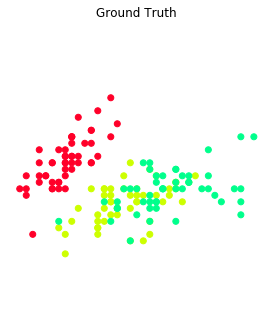

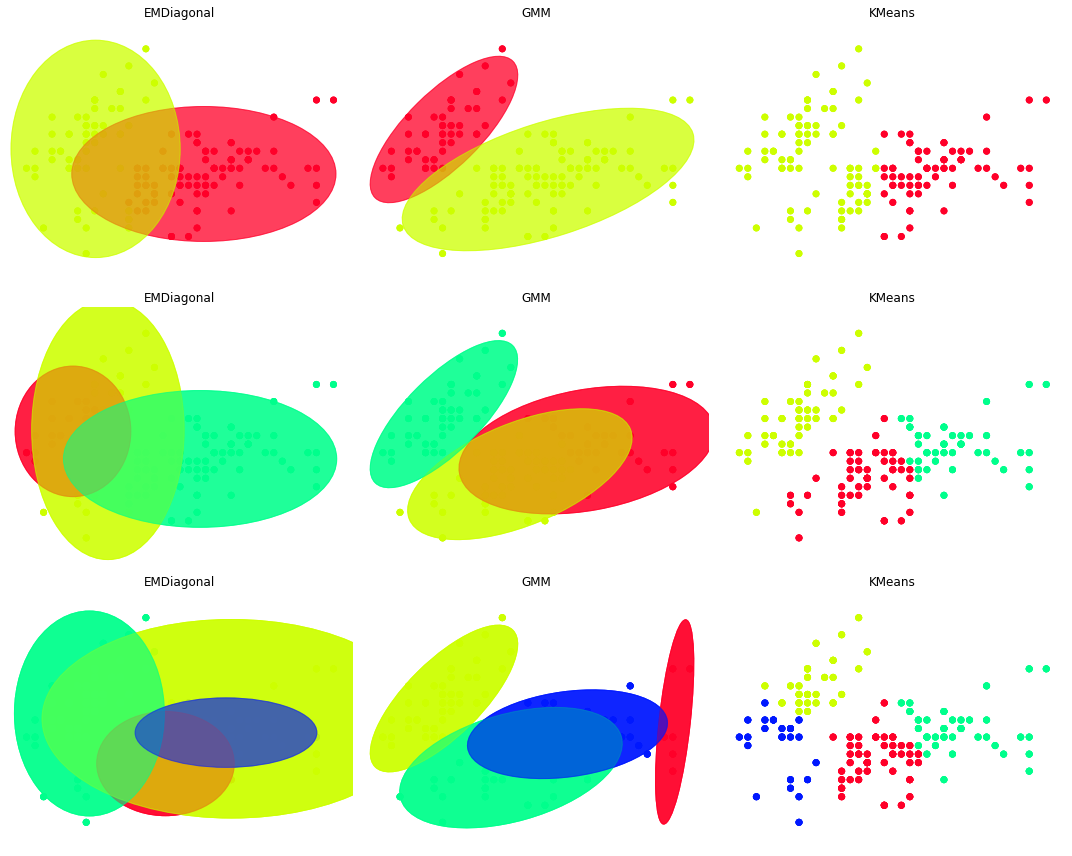

In [4]:
X_projected = X[:, :2] # project on the first two dimensions
compare_clustering(models, X_projected, y, [2, 3, 4])

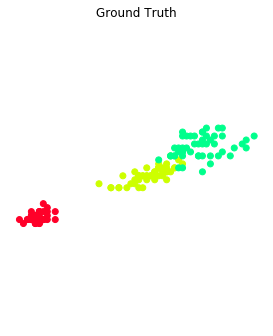

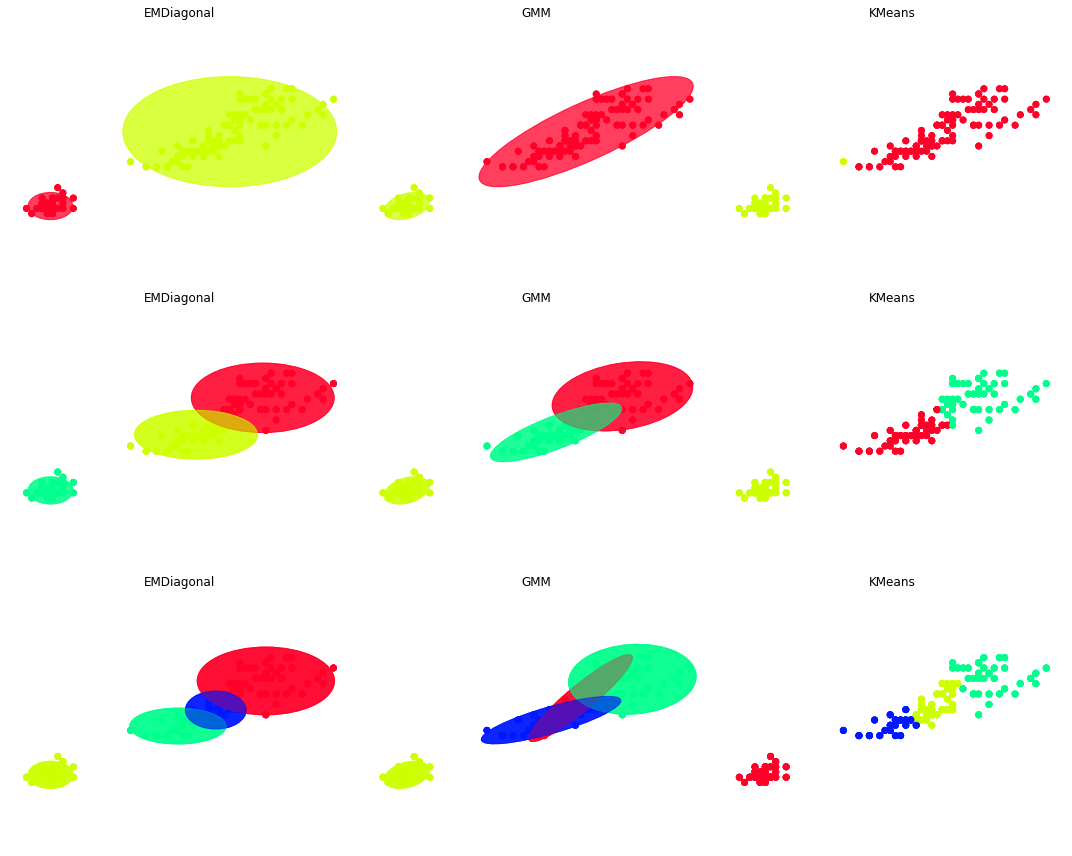

In [5]:
X_projected = X[:, 2:] # project on the last two dimensions
compare_clustering(models, X_projected, y, [2, 3, 4])

## Typical example where KMeans fails

Generate a mixture of two Gaussian distributions with same mean and covariance aligned on different axes.

KMeans produces a hard clustering based on the distance therefore it works best when clusters are separated. In this case, clusters are spatially centered around the same centroid, which results in kMeans creating an artificial left/right clustering. Gaussian mixture models fit a probability distribution and then attribute points to the cluster of maximum probability (soft clustering).

Note that since the Gaussians are aligned with the principal axis, EMDiagonal also outperforms the general GMM. Because of the iterative approximation used in the EM algorithm, the GMM falls in a local maximum of likelihood and cannot find the optimal clustering. EMDiagonal is less parametrized, the search space is therefore simpler, with less local maxima. Another way to look at this is to interpet EMDiagonal as a Bayesian version of the general GMM where we infuse the prior that all intra-cluster correlation are zero.

In [6]:
# number of clusters
K = 2

# Number of points per cluster
N = 200

# single centroid
centroid = np.zeros(2)

covs = np.array([
    np.array([[1.0, 0.0], [0.0, 5.0]]),
    np.array([[5.0, 0.0], [0.0, 1.0]])
])

X = np.empty((N*K, 2))
y = np.empty(N*K)

for i in range(K):
    X[i*N:(i+1)*N, :] = np.random.multivariate_normal(centroid, covs[i], N)
    y[i*N:(i+1)*N] = i

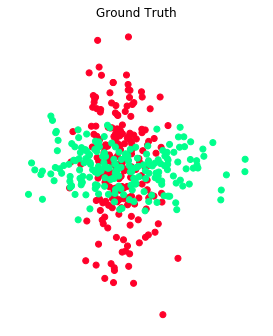

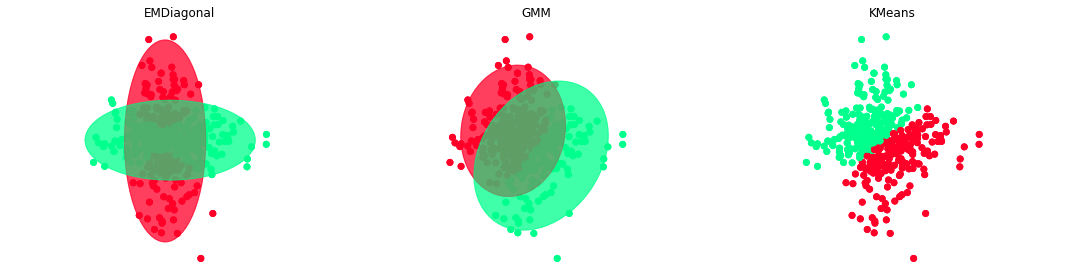

In [7]:
compare_clustering(models, X, y, [K])

## Typical example where EMDiagonal fails

Generate Gaussian mixtures with some clusters not aligned with the axis (i.e strong intra-cluster correlation).

The family of statistical models generated by EMDiagonal is not expressive enough to fit the data, whereas both KMeans and the general GMM are doing it perfectly.

In [8]:
# number of clusters
K = 3

# Number of points per cluster
N = 200

centroids = 0.5*np.random.randn(K, 2)
covs = np.array([np.array([[1.0, rho], [rho, 1.0]]) for rho in [-0.9, 0.0, 0.9]])

X = np.empty((N*K, 2))
y = np.empty(N*K)

for i in range(K):
    X[i*N:(i+1)*N, :] = np.random.multivariate_normal(centroids[i], covs[i], N)
    y[i*N:(i+1)*N] = i

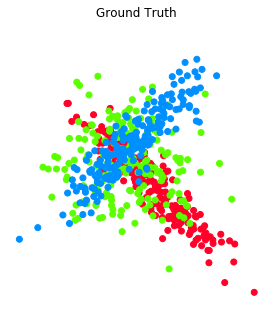

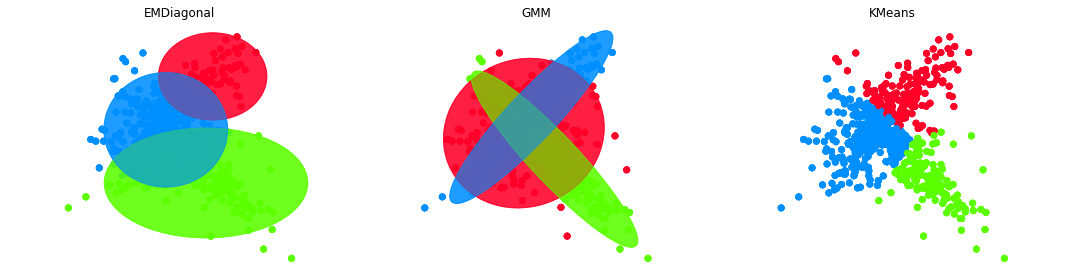

In [9]:
compare_clustering(models, X, y, [K])

## Typical example where they all fail


KMeans and GMM only work out-of-the-box when the clusters are shaped like balls or ellipsoids. When the data have a different structure, these algorithms only converge to poor local minima.

In [10]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=600)

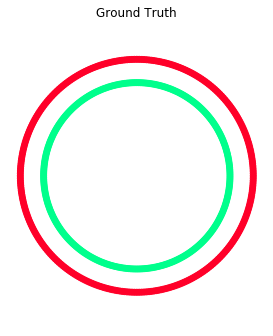

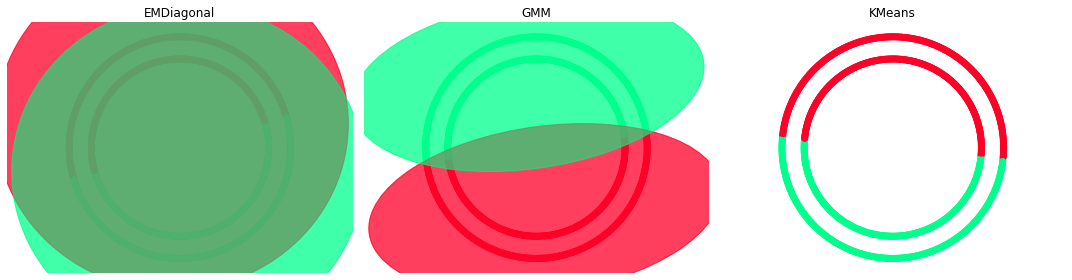

In [11]:
compare_clustering(models, X, y, [2])